# 1.线性回归（单变量）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 数据处理（公共Operation）

In [39]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


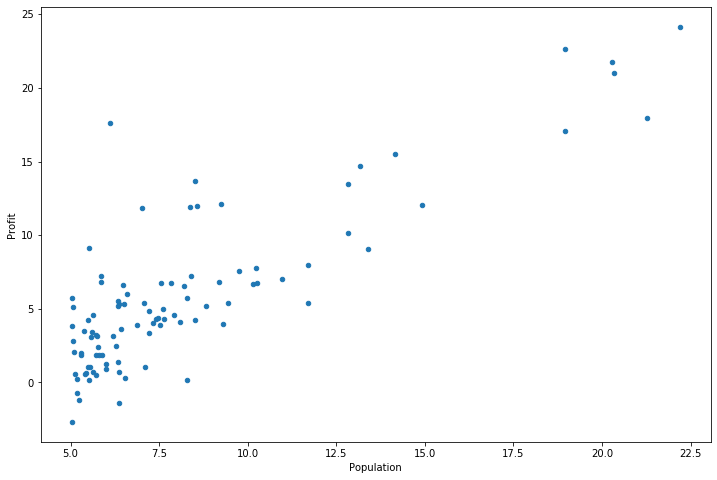

In [40]:
x = data['Population']
y = data['Profit']
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show() # pandas中基本的绘图函数

## 代价函数

![](img/cost.png)

In [41]:
# 新增一例，x0
data.insert(0, 'Ones', 1)
#在第0列添加name为‘Ones’的属性，值全部赋值为1
#为了矩阵运算
data.head()


,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [42]:
print(data.shape)
#输出二维数组的行，列数
# data.shape[0] 行
# data.shape[1] 列

(97, 3)


In [43]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
#取所有行和0-col-1列交叉的所有的数据
Y = data.iloc[:, cols-1:cols]

In [44]:
X.head()
print(type(X))#X是pandas中的dataframe

<class 'pandas.core.frame.DataFrame'>


In [45]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
#转换为矩阵
theta = np.matrix(np.array([0, 0]))
print(theta)

[[0 0]]


In [10]:
X.shape, Y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [11]:
#代价函数J(theta)
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T) - Y, 2)
    #(X * theta.T)牵扯到矩阵运算
    return np.sum(inner) / (2 * len(X))

In [33]:
computeCost(X, Y, theta)

32.072733877455676

## 1.1使用代价函数（梯度下降法)

## 梯度下降

![](img/gradient.png)

In [28]:
# 梯度下降
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) # matrix([[0, 0]])
    parameters = int(theta.shape[1]) # 2
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = X * theta.T - Y
        
        for j in range(parameters): #更新theta0和theta1
            term = np.multiply(error, X[:, j])
            temp[0, j] = temp[0, j] - alpha / len(X) * np.sum(term)
            #temp第0行第j列
        
        theta = temp
        cost[i] = computeCost(X, Y, theta)
    
    return theta, cost

In [40]:
alpha = 0.01
iters = 1000 #迭代1000次
g, cost = gradientDescent(X, Y, theta, alpha, iters)
g #计算得到的最合适的theta

matrix([[-3.24140214,  1.1272942 ]])

In [41]:
# 计算训练模型的误差
computeCost(X, Y, g)

4.515955503078912

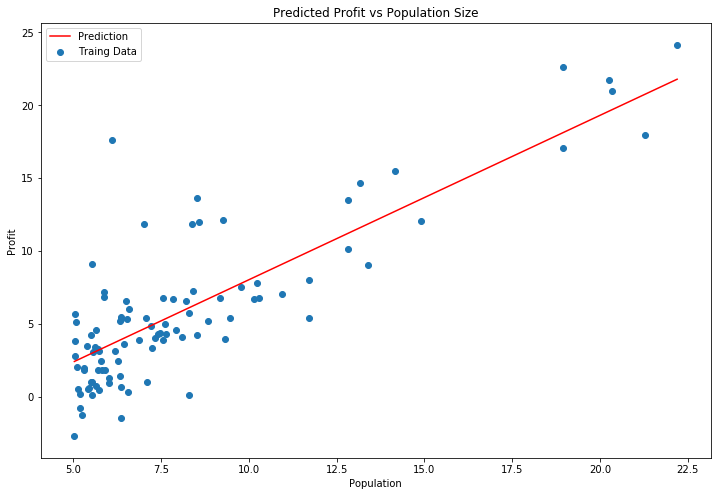

In [44]:
# 画出拟合图像
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + g[0, 1] * x

plt.figure(figsize=(12, 8))
plt.xlabel('Population')
plt.ylabel('Profit')
l1 = plt.plot(x, f, label='Prediction', color='red')
l2 = plt.scatter(data.Population, data.Profit, label='Traing Data', )
plt.legend(loc='best')
plt.title('Predicted Profit vs Population Size')
plt.show()

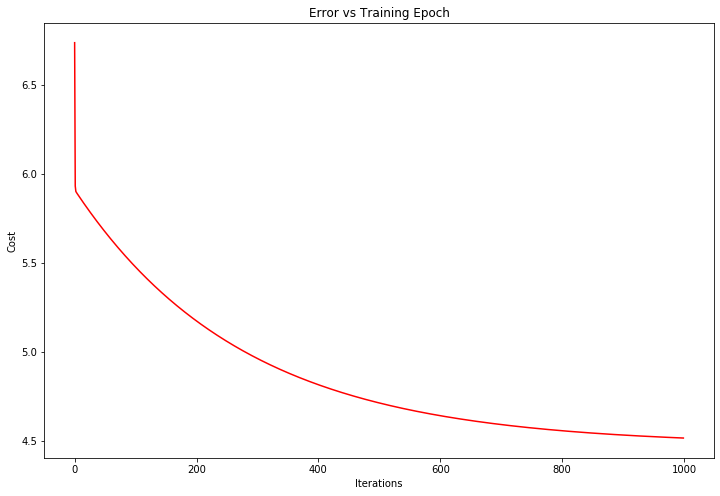

In [43]:
# 画出cost的走势
plt.figure(figsize=(12, 8))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs Training Epoch')
plt.plot(np.arange(iters), cost, 'r')
plt.show()

## 1.2使用正则方程

## 正则方程

![](img/regularization.png)

In [13]:
def normalEqn(X, Y):
    theta = np.linalg.inv(X.T@X)@X.T@Y
    return theta

In [14]:
theta = normalEqn(X, Y)
# 梯度下降的theta为 matrix([[-3.24140214,  1.1272942 ]])
theta

matrix([[-3.89578088],
        [ 1.19303364]])

In [15]:
# 梯度下降的cost为 4.515955503078912
computeCost(X, Y, theta.reshape(1, -1))

4.476971375975179

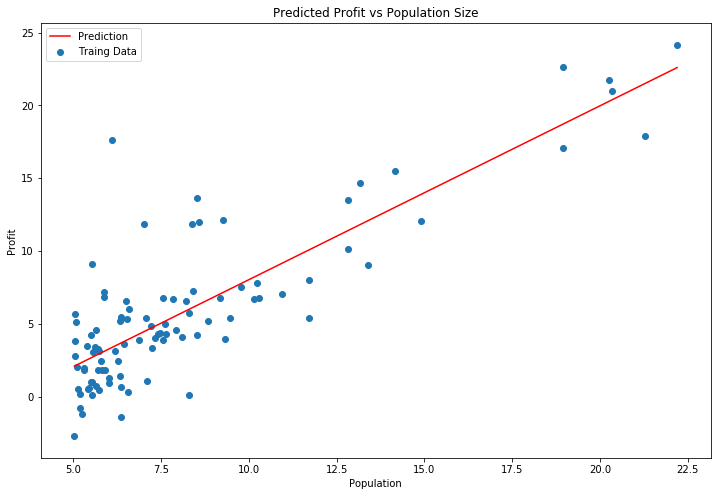

In [16]:
# 画出拟合图像
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta[0,0] + theta[1,0] * x

plt.figure(figsize=(12, 8))
plt.xlabel('Population')
plt.ylabel('Profit')
l1 = plt.plot(x, f, label='Prediction', color='red')
l2 = plt.scatter(data.Population, data.Profit, label='Traing Data', )
plt.legend(loc='best')
plt.title('Predicted Profit vs Population Size')
plt.show()

## 1.3使用scikit-learn方法

In [49]:
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [17]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
x = np.array(X[:, 1].A1)
y = model.predict(X).flatten()
y

array([ 3.39377399,  2.6989512 ,  6.26719552,  4.45927234,  3.09515767,
        6.10530086,  5.02381586,  6.33818102,  3.84247394,  2.13452698,
        2.91727635, 13.00234766,  2.94507404,  6.13572322,  2.833764  ,
        2.52202431,  3.69835548,  2.22460102,  3.77494824,  4.53992141,
        3.48802365, 20.28701109,  2.65409313,  3.65146926,  2.74333205,
       18.70624151, 11.40845471,  9.17628876, 11.82363042, 22.59314512,
        2.37050903,  3.96559502,  7.13763287,  3.13333475,  5.90033768,
        5.56903223,  5.7629002 ,  2.79272364, 11.41799898,  3.68403908,
        2.55483273,  4.31527318, 10.07225703,  2.99243747,  5.43934948,
        4.56652606,  2.1531383 ,  3.02548451, 10.06271276,  2.71553436,
        5.09993141,  2.43648379,  4.96118159,  5.17497322,  3.65946258,
        3.69060076,  3.58955081,  2.83257096,  7.21160096,  7.38268198,
        6.63321825,  2.28329828, 21.49078204, 13.88996469, 18.72294398,
        4.71577457,  6.0005525 ,  8.3161115 ,  2.66518834, 20.37

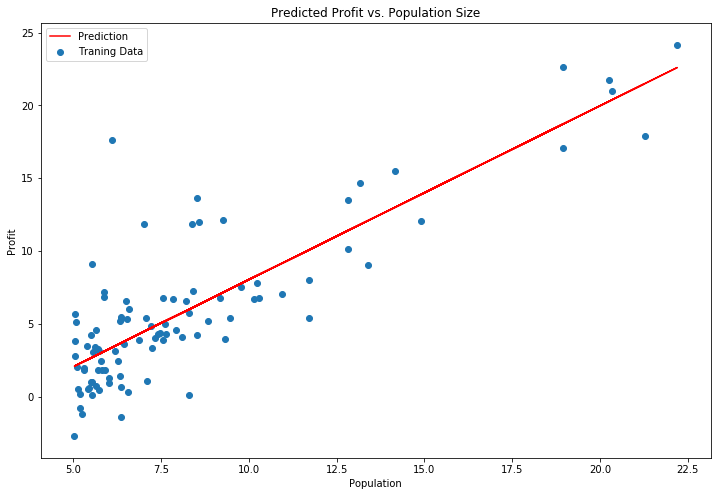

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 2.线性回归（多变量）
## 使用代价函数（梯度下降法）

In [23]:
path = 'ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
# 保存mean、std、mins、maxs、data
means = data.mean().values
stds = data.std().values
mins = data.min().values
maxs = data.max().values
data_ = data.values
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [25]:
# 特征缩放
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [26]:
# add ones column
data.insert(0, 'Ones', 1)

In [29]:
# set X (training data) and Y (target variable)
cols = data.shape[1]
X = data.iloc[:, :cols-1]
Y = data.iloc[:, cols-1:cols]

# convert to matrices and initialize theta
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0, 0, 0]))

# perform linear regression on the data set
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, Y, theta, alpha, iters)

# get the cost(error) of the model
computeCost(X, Y, g)

0.13070336960771892

In [30]:
g

matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])

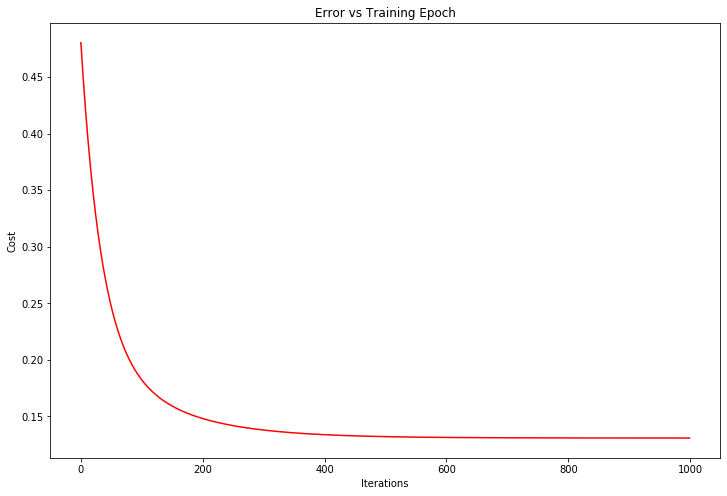

In [31]:
# 画出cost图像
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')
plt.show()

In [32]:
def theta_transform(theta, means, stds):
    temp = means[:-1] * theta[1:] / stds[:-1]
    theta[0] = (theta[0] - np.sum(temp)) * stds[-1] + means[-1]
    theta[1:] = theta[1:] * stds[-1] / stds[:-1]
    return theta.reshape(1, -1)

In [33]:
g_ = np.array(g.reshape(-1, 1))
means = means.reshape(-1, 1)
stds = stds.reshape(-1, 1)
transform_g = theta_transform(g_, means, stds)
transform_g

array([[88307.21151185,   138.22534685, -7709.05876589]])

In [34]:
# 预测价格
def predictPrice(x, y, theta):
    return theta[0, 0] + theta[0, 1]*x + theta[0, 2]*y

# 2104,3,399900, 
price = predictPrice(2104, 3, transform_g)
price

356006.16498795623

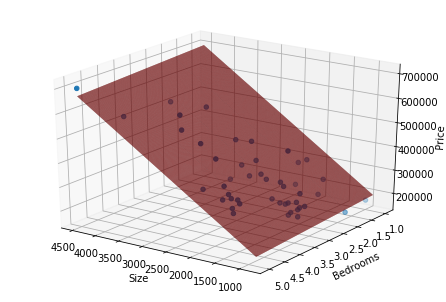

In [35]:
# 画出拟合平面
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X_ = np.arange(mins[0], maxs[0]+1, 1)
Y_ = np.arange(mins[1], maxs[1]+1, 1)
X_, Y_ = np.meshgrid(X_, Y_)
Z_ = transform_g[0,0] + transform_g[0,1] * X_ + transform_g[0,2] * Y_

# 手动设置角度
ax.view_init(elev=25, azim=125)

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

ax.plot_surface(X_, Y_, Z_, rstride=1, cstride=1, color='red')

ax.scatter(data_[:, 0], data_[:, 1], data_[:, 2])
plt.show()

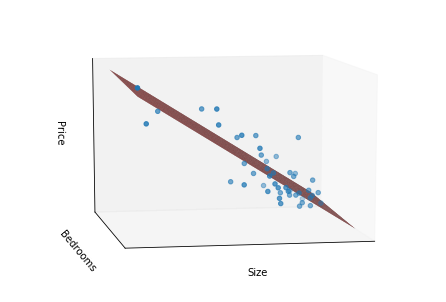

In [36]:
# jupyter不能调角度...
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X_ = np.arange(mins[0], maxs[0]+1, 1)
Y_ = np.arange(mins[1], maxs[1]+1, 1)
X_, Y_ = np.meshgrid(X_, Y_)
Z_ = transform_g[0,0] + transform_g[0,1] * X_ + transform_g[0,2] * Y_

# 手动设置角度
ax.view_init(elev=10, azim=80)

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.plot_surface(X_, Y_, Z_, rstride=1, cstride=1, color='red')

ax.scatter(data_[:, 0], data_[:, 1], data_[:, 2])
plt.show()